<a href="https://colab.research.google.com/github/jwgdmkj/jupiterColab/blob/master/Relu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Epoch 1/200
8/8 [==============================] - 1s 20ms/step - loss: 568.8103 - val_loss: 553.8718
Epoch 2/200
8/8 [==============================] - 0s 5ms/step - loss: 508.2822 - val_loss: 494.3649
Epoch 3/200
8/8 [==============================] - 0s 5ms/step - loss: 452.9648 - val_loss: 432.3276
Epoch 4/200
8/8 [==============================] - 0s 5ms/step - loss: 394.9819 - val_loss: 368.1646
Epoch 5/200
8/8 [==============================] - 0s 5ms/step - loss: 334.7748 - val_loss: 302.6211
Epoch 6/200
8/8 [==============================] - 0s 5ms/step - loss: 273.9938 - val_loss: 238.9703
Epoch 7/200
8/8 [==============================] - 0s 6ms/step - loss: 215.7854 - val_loss: 182.0486
Epoch 8/200
8/8 [==============================] - 0s 4ms/step - loss: 163.0822 - val_loss: 132.4566
Epoch 9/200
8/8 [==============================] - 0s 5ms/step - loss: 118.4436 - val_loss: 95.3209
Epoch 10/200
8/8 [==============================] - 0s 4ms/step - loss: 84.4852 - val_loss:

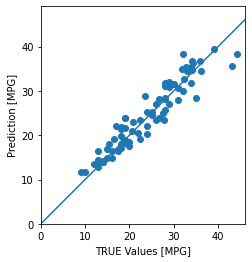

In [2]:
#RELU가 아닌 것들: layer가 깊어질수록 학습이 안 됨
#weight값을 변경시킬 때, 미분값을 이용하는데, sigmoid나 tanh 등은 갈수록 미분값이 0됨
#RELU는 GRADIENT가 1로 유지되기에, 학습에 적절
#이 RELU를 히든레이어에 추가하고자 한다.

#linear regression: x y 데이터의 상관관계를 linear한 모델로 하는 것
#최적화된 빨간 선을, keras로 구현
import tensorflow as tf
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers
tf.__version__

dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

# 받은 데이터는 csv형태로 저장됨.
# pandas 형태로 csv파일을 읽음
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Model Year', 'Origin']
raw_dataset = pd.read_csv(dataset_path, names=column_names,
                      na_values = "?", comment='\t',
                      sep=" ", skipinitialspace=True)

dataset = raw_dataset.copy()
dataset.tail() #dataset.head()

dataset = dataset.dropna()

#dataset.isna().sum()

# len(dataset) #398개의 데이터가 준비됨
# origin : 국가의 분류. 이는 필요하지 않은 data 이므로, 제거
dataset.pop('Origin') 

#training set과 test_set을 분류 (overfitting 방지)
train_dataset = dataset.sample(frac = 0.8, random_state = 0) #80%만 train에 사용
test_dataset = dataset.drop(train_dataset.index)

#모델 설계에 앞서, 데이터 정규화를 통해 편차를 감소시켜야 함
#이때, MPG라는 값은 정규화가 불필요하기에, 새로운 '레이블'이란 이름으로 정의
train_stats = train_dataset.describe()
train_stats.pop('MPG')
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')
train_stats = train_stats.transpose()

def norm(x):
  return(x- train_stats['mean']) / train_stats['std']

normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

#x데이터 준비 완료. 여기에, linear 모델(x*행렬 w+bias 가 y값을 의미)
#이 input data와 곱해질 행렬값을 학습하게 됨

# 그 행렬 모델을 만든다
# keras 모델이 알아야 할 것: input shape
# 318, 6: 현재 data 수와, 칼럼의 수. 이 중 칼럼을 중시한다.
inputs = keras.Input(shape=(normed_train_data.shape[1],)) # 6을 shape에 대입

# 행렬 만들기.
h= layers.Dense(64)(inputs) #64짜리 feature의 행렬 생성. 
# 최종 행렬은, y가 숫자 MPG값 1인 행렬을 맞춰야 하므로
outputs = layers.Dense(1)(h)

# 행렬 정의 완료. 
model = keras.Model(inputs = inputs, outputs = outputs)
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001))


#레이어 별로, input과 output 보기
keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes = True)

# input과 output 사이의 히든레이어를 추가하고자 한다(현재는 1개)
# h가, 다음 레이어의 input으로 들어가야 함.
inputs = keras.Input(shape=(normed_train_data.shape[1],))
h = layers.Dense(64)(inputs)
#h= layers.Dense(64, activation='relu')(inputs)

#Activation layer가 추가됨.
#epoch을 하면, evaluation은 오차가 7가량까지 감소하며, 
#플러팅을 하면, 더 직선에 가까워짐
h = layers.Activation('relu')(h)

h = layers.Dense(32)(h)
outputs = layers.Dense(1)(h)

model = keras.Model(inputs = inputs, outputs = outputs)
#결과, 레이어가 1개 증가
model.compile(loss = 'mse', optimizer = tf.keras.optimizers.RMSprop(0.001))

"""컴파일은, input 데이터를, y = x*W+b 하는 것
이 떄, W와 b(bias)를 점차 변화시켜가며, 행렬값을, y를 실제 정답과 일치하도록 해야 함
이 '오차를 줄여가는 과정'을 나아가는 것이 ML
차이를 표현하는 방법 중, loss = 'mse'를 이용 & optimizer : 오차가 생겼을 떄, b를 어떻게 
변경해갈 것인가? RMSprop을 이용"""

"""
y = W*x+b의 W와 b는 현재 임의로 지정된 값. 
"""
"""
점차 학습시켜가며 똑똑하게 하자. 5개의 모델만을 test(with predict)
"""
example_batch = normed_train_data[:5]
example_result = model.predict(example_batch) #부정확한 값. 이제, 학습시킨다

# 이 모델을 훈련. fit 통해, 학습시켜간다(행렬값이바뀌며, y가 실제값에 가까워짐)
#fit안에, x값(인풋데이터), 정답데이터(y), epoch삽입
"""
epoch: dataset 전체(318row)를, 각 한 번 학습하면 1. 이를 총 얼마나 학습할 것인가?
트레이닝 하면, loss는 감소할 것. but 과적합의 문제: 무조건 똑똑해지면 안됨.
어느 정도의 수준값까지만 똑똑해져야 함(validation loss). 학습에 쓰이지 않은 data.
이 loss값을 보고, 과적합/아직 학습가능 여부 판단
"""

EPOCHS = 200
history = model.fit(normed_train_data, train_labels, epochs = EPOCHS,
                    validation_split = 0.2)

"""
오차 loss(트레이닝 로스), validation loss 전부 감소 중
만일 이 EPCOH를 100으로 하면, 이 역시 더 작아지는데, 어느 순간부터 급격한 감소는 사라짐.
이것을 가능케 하는 건 '케라스'로, VALIDATION LOSS를 자동으로 EARLY STOPPING통해
트레이닝 멈추는 조건을 찾음
"""

# 오차 loss(트레이닝 로스), validation loss 전부 감소 중\n만일 이 EPCOH를 100으로 하면, 이 역시 더 작아지는데,
 #어느 순간부터 급격한 감소는 사라짐.\n이것을 가능케 하는 건 '케라스'로, VALIDATION LOSS를 자동으로 EARLY STOPPING통해\n트레이닝 멈추는 조건을 찾음\n"

"""
PATIENCE=10은, VALIDATION LOSS가 10번 이상 줄지 않으면, 학습을 그만시킨단 뜻
"""
early_stop = keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

model.fit(normed_train_data, train_labels, epochs = EPOCHS, validation_split = 0.2,
          callbacks = [early_stop])

"""
이제, 평가를 하고자함. 그 결과, 맨 초기의 약 500에서 10.91까지 감소
"""
loss = model.evaluate(normed_test_data, test_labels, verbose=2)

"""
실제 값 예측 법: predict로
"""
test_prediction= model.predict(normed_test_data).flatten()

#실제값과 예측값을 비교.
plt.scatter(test_labels, test_prediction)
plt.xlabel('TRUE Values [MPG]')
plt.ylabel('Prediction [MPG]')
plt.axis('equal')
plt.axis('square')
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_ = plt.plot([-100, 100], [-100, 100])
